In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Section 1: Implementing Clustering Algorithm on housing data.
- It cluster the data based on its longitude, latitude and ocean proximity

In [2]:
data = pd.read_csv('housing.csv',usecols=['longitude','latitude','ocean_proximity','median_house_value'])
data.head()

,longitude,latitude,median_house_value,ocean_proximity
0,-122.23,37.88,452600.0,NEAR BAY
1,-122.22,37.86,358500.0,NEAR BAY
2,-122.24,37.85,352100.0,NEAR BAY
3,-122.25,37.85,341300.0,NEAR BAY
4,-122.25,37.85,342200.0,NEAR BAY


In [3]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
X = data.loc[:,['longitude','latitude','ocean_proximity']]
y = data['ocean_proximity']

In [5]:
X

,longitude,latitude,ocean_proximity
0,-122.23,37.88,NEAR BAY
1,-122.22,37.86,NEAR BAY
2,-122.24,37.85,NEAR BAY
3,-122.25,37.85,NEAR BAY
4,-122.25,37.85,NEAR BAY
...,...,...,...
20635,-121.09,39.48,INLAND
20636,-121.21,39.49,INLAND
20637,-121.22,39.43,INLAND
20638,-121.32,39.43,INLAND


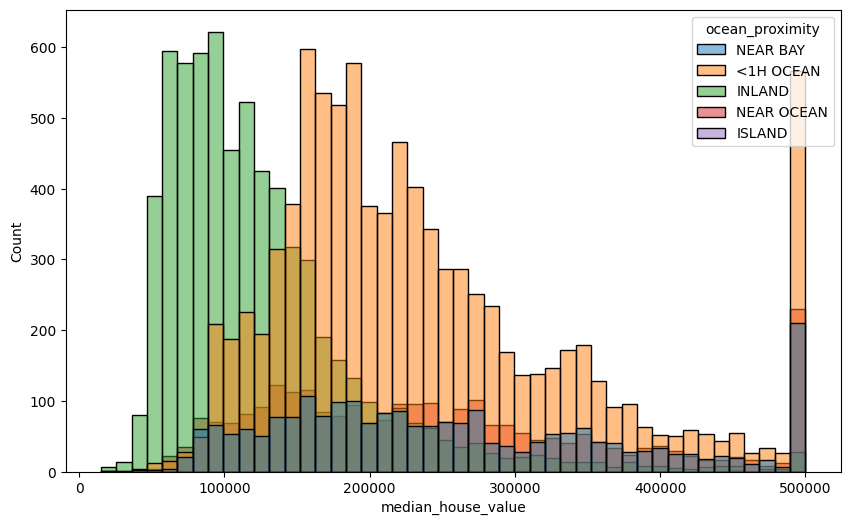

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='median_house_value',hue='ocean_proximity',)
plt.show()

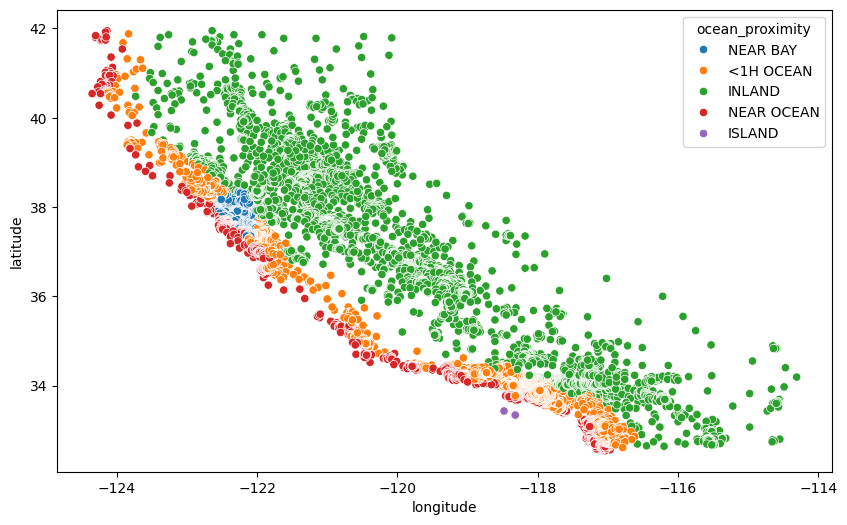

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='longitude',y='latitude',hue='ocean_proximity',)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['ocean_proximity'] = lb.fit_transform(X['ocean_proximity'])
y = lb.transform(y)


In [9]:
X

,longitude,latitude,ocean_proximity
0,-122.23,37.88,3
1,-122.22,37.86,3
2,-122.24,37.85,3
3,-122.25,37.85,3
4,-122.25,37.85,3
...,...,...,...
20635,-121.09,39.48,1
20636,-121.21,39.49,1
20637,-121.22,39.43,1
20638,-121.32,39.43,1


In [10]:
y

array([3, 3, 3, ..., 1, 1, 1])

In [11]:
lb.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [12]:
# LabelEncoder assigns labels in lexicographical order.
for i, class_label in enumerate(lb.classes_):
    print(f"{class_label}: {i}")

<1H OCEAN: 0
INLAND: 1
ISLAND: 2
NEAR BAY: 3
NEAR OCEAN: 4


In [13]:
from sklearn.preprocessing import normalize
## Normalize the data
X_norm = normalize(X)
X_norm

array([[-0.95491991,  0.29593689,  0.02343745],
       [-0.95495718,  0.29581639,  0.02344028],
       [-0.954993  ,  0.29570096,  0.02343733],
       ...,
       [-0.95092753,  0.30931424,  0.00784464],
       [-0.95100255,  0.30908367,  0.00783879],
       [-0.95108087,  0.30884241,  0.00784461]])

### with number of cluster 3

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X_norm)

KMeans(n_clusters=3, random_state=0)

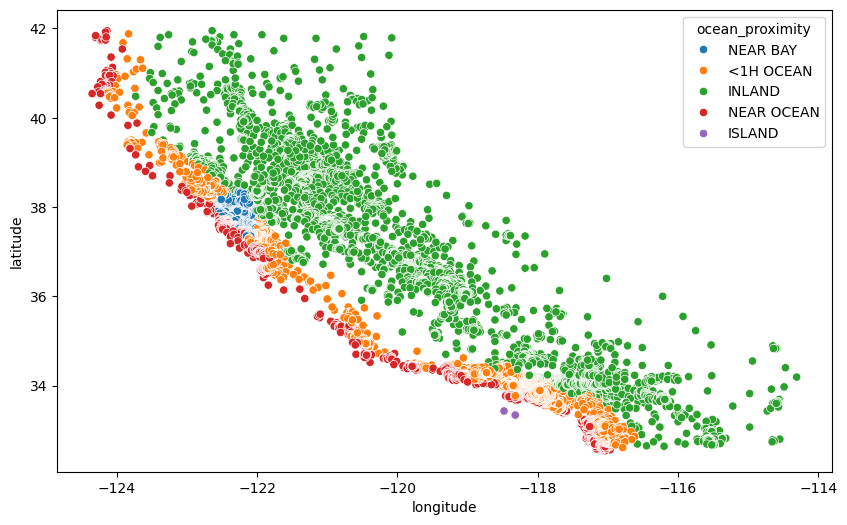

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='longitude',y='latitude',hue='ocean_proximity',)
plt.show()

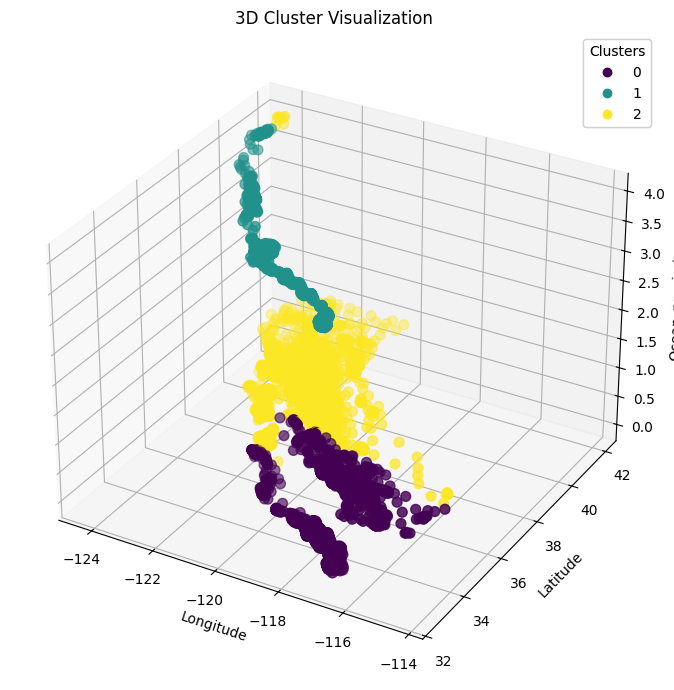

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111,projection='3d')
scatter = ax.scatter(X['longitude'],X['latitude'],X['ocean_proximity'],c=kmeans.labels_,cmap='viridis',s=50)
# ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Ocean_proximity')

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.title("3D Cluster Visualization")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
kmeans_labels = kmeans.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmeans_silhouette_score = silhouette_score(X_norm, kmeans_labels)

# Calculate the adjusted Rand Index (ARI) score (a measure of how well the clusters match the true labels)
kmeans_ari_score = adjusted_rand_score(y, kmeans_labels)

print(f"K-means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette_score:.4f}")
print(f"Adjusted Rand Index Score: {kmeans_ari_score:.4f}")

K-means Clustering:
Silhouette Score: 0.6402
Adjusted Rand Index Score: 0.4719


### Section - 2 Implementing Clustering on Mall-customer data

In [18]:
data2 = pd.read_csv('Mall_Customers.csv')
data2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**We'll try to find the people behaviour based on the Annual income and Spending Score**

In [19]:
X = data2.iloc[:,[3,4]].values

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans = km.fit_predict(X) #Compute cluster centers and predict cluster index for each sample

In [21]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [22]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

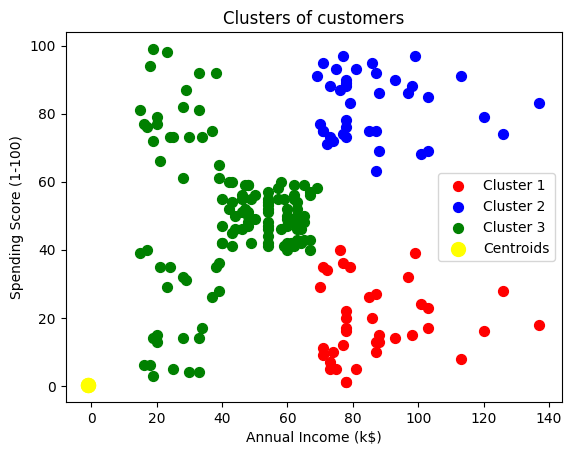

In [23]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, da
kmeans_labels = km.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmeans_silhouette_score = silhouette_score(X, kmeans_labels)

print(f"K-means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette_score:.4f}")

K-means Clustering:
Silhouette Score: 0.4676


The initial cluster doesn't segment well. We will use **Elbow Method** to identify the correct number of cluster.

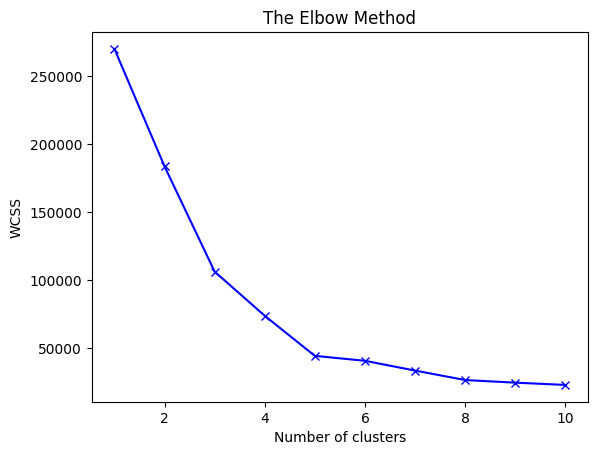

In [25]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

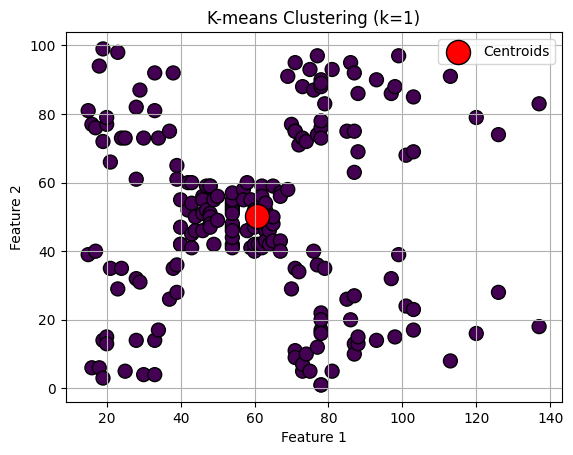

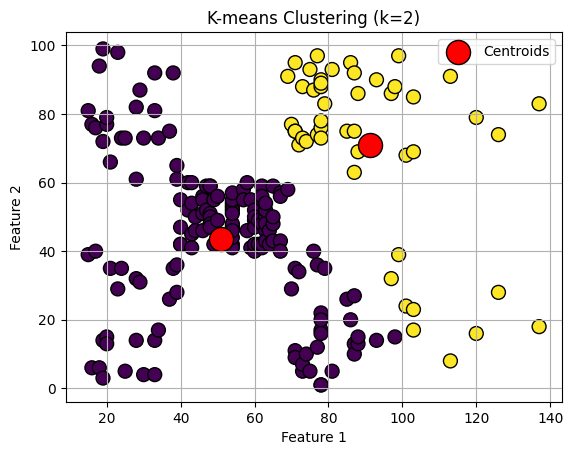

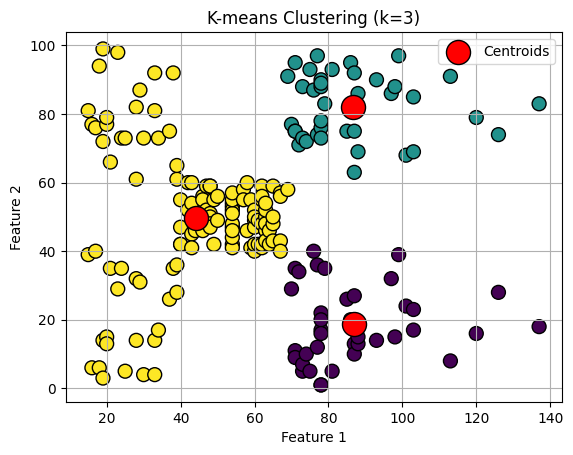

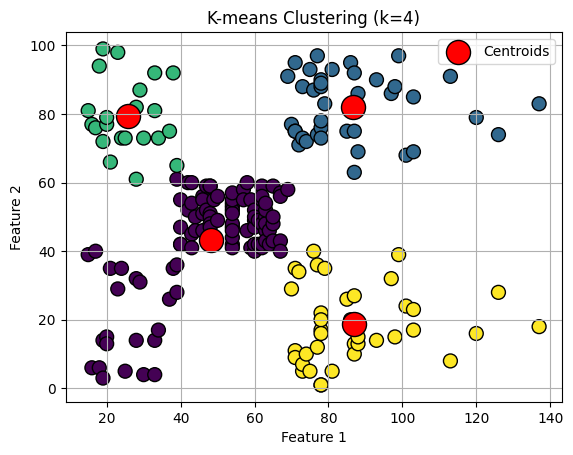

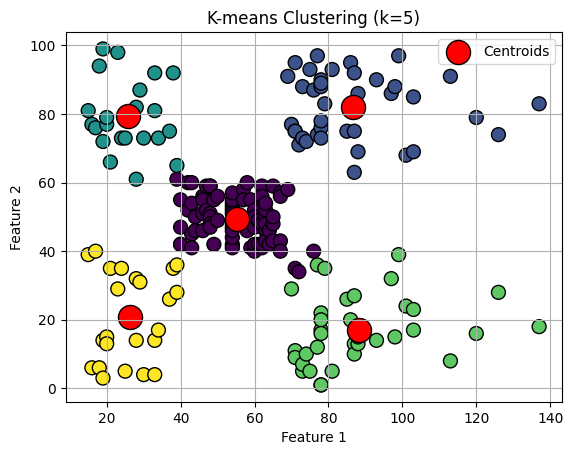

In [26]:
k_range = range(1, 6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
    plt.title(f'K-means Clustering (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid()
    plt.show()

#### It seems 5 cluster wiil be the ideal to define 

In [27]:
from sklearn.cluster import KMeans
km_5 = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans_5 = km_5.fit_predict(X)

In [28]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
kmeans_labels_5 = km_5.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmeans_silhouette_score = silhouette_score(X, kmeans_labels_5)

print(f"K-means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette_score:.4f}")

K-means Clustering:
Silhouette Score: 0.5539


### Section -3 Using Synthetic data

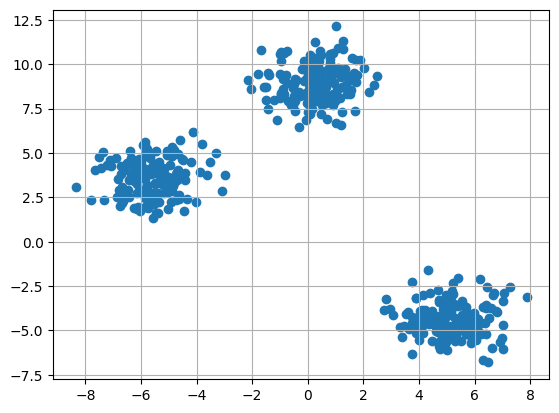

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [30]:
km_3 = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans_3 = km_3.fit_predict(X)

In [31]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
kmeans_labels_3 = km_3.labels_

# Calculate the silhouette score (a measure of how well-defined the clusters are)
kmeans_silhouette_score = silhouette_score(X, kmeans_labels_3)

print(f"K-means Clustering:")
print(f"Silhouette Score: {kmeans_silhouette_score:.4f}")

K-means Clustering:
Silhouette Score: 0.8123


In [32]:
# Calculate the adjusted Rand Index (ARI) score (a measure of how well the clusters match the true labels)
kmeans_ari_score = adjusted_rand_score(y, kmeans_labels_3)
print(f"Adjusted Rand Index Score: {kmeans_ari_score:.4f}")

Adjusted Rand Index Score: 1.0000


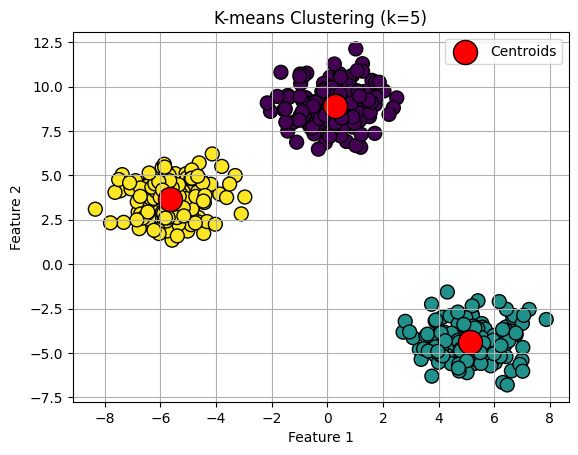

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_3, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.scatter(km_3.cluster_centers_[:, 0], km_3.cluster_centers_[:, 1],
                s=300, c='red', label='Centroids', edgecolor='k')
plt.title(f'K-means Clustering (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()